In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
from datetime import datetime

In [2]:
start='2009-01-01'
end = datetime.now()
df=data.DataReader('AAPL','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2008-12-31,3.133571,3.047857,3.070357,3.048214,6.075412e+08,2.602663
2009-01-02,3.251429,3.041429,3.067143,3.241071,7.460152e+08,2.767329
2009-01-05,3.435000,3.311071,3.327500,3.377857,1.181608e+09,2.884121
2009-01-06,3.470357,3.299643,3.426786,3.322143,1.289310e+09,2.836552
2009-01-07,3.303571,3.223571,3.278929,3.250357,7.530488e+08,2.775259


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-09-13,160.539993,153.369995,159.899994,153.839996,122656600.0,153.839996
2022-09-14,157.100006,153.610001,154.789993,155.309998,87965400.0,155.309998
2022-09-15,155.240005,151.380005,154.649994,152.369995,90481100.0,152.369995
2022-09-16,151.350006,148.369995,151.210007,150.699997,162157000.0,150.699997
2022-09-19,154.559998,149.100006,149.309998,154.479996,81328800.0,154.479996


In [4]:
df=df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2008-12-31,3.133571,3.047857,3.070357,3.048214,6.075412e+08,2.602663
1,2009-01-02,3.251429,3.041429,3.067143,3.241071,7.460152e+08,2.767329
2,2009-01-05,3.435000,3.311071,3.327500,3.377857,1.181608e+09,2.884121
3,2009-01-06,3.470357,3.299643,3.426786,3.322143,1.289310e+09,2.836552
4,2009-01-07,3.303571,3.223571,3.278929,3.250357,7.530488e+08,2.775259


In [5]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,High,Low,Open,Close,Volume
0,3.133571,3.047857,3.070357,3.048214,6.075412e+08
1,3.251429,3.041429,3.067143,3.241071,7.460152e+08
2,3.435000,3.311071,3.327500,3.377857,1.181608e+09
3,3.470357,3.299643,3.426786,3.322143,1.289310e+09
4,3.303571,3.223571,3.278929,3.250357,7.530488e+08


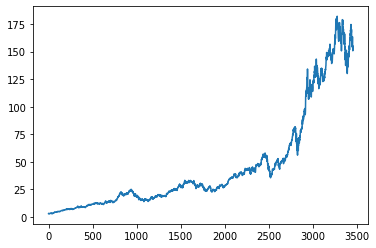

In [6]:
plt.plot(df.Close)

In [7]:
ma50=df.Close.rolling(50).mean()
ma50

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3448    158.9240
3449    159.1990
3450    159.3880
3451    159.4750
3452    159.6238
Name: Close, Length: 3453, dtype: float64

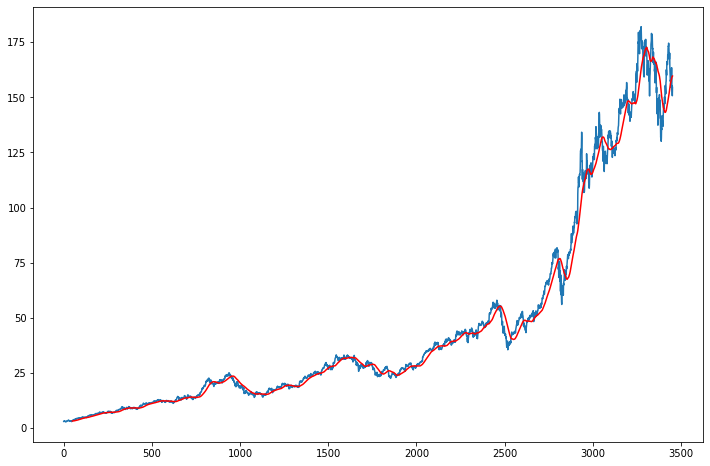

In [9]:
plt.figure(figsize=(12,8))
plt.plot(df.Close,label='Original Price')
plt.plot(ma50,'r',label='50 Days Moving AVG')

In [10]:
ma100=df.Close.rolling(100).mean()
ma200=df.Close.rolling(200).mean()

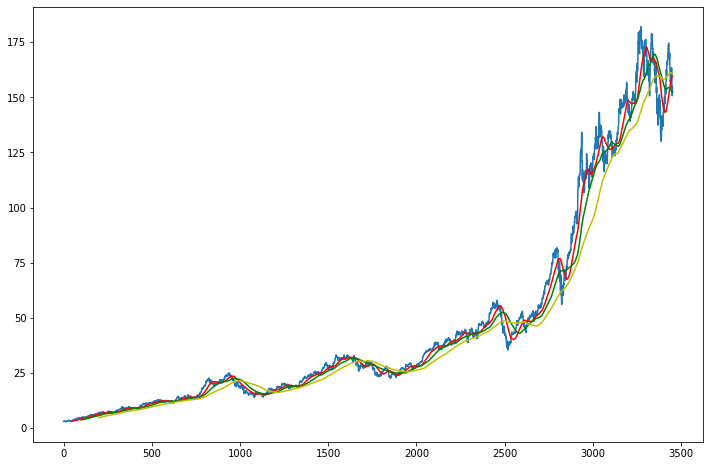

In [12]:
plt.figure(figsize=(12,8))
plt.plot(df.Close,label='Original Price')
plt.plot(ma50,'r',label='50 Days Moving AVG')
plt.plot(ma100,'g',label='100 Days Moving AVG')
plt.plot(ma200,'y',label='200 Days Moving AVG')

In [13]:
df.shape

(3453, 5)

In [14]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.80)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.80):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(2762, 1)
(691, 1)


In [15]:
data_training.head()

,Close
0,3.048214
1,3.241071
2,3.377857
3,3.322143
4,3.250357


In [16]:
data_testing.head()

,Close
2762,69.860001
2763,71.000000
2764,71.067497
2765,72.477501
2766,72.449997


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [18]:
data_training_arr=scaler.fit_transform(data_training)
data_training_arr

array([[0.00379377],
       [0.00665899],
       [0.00869118],
       ...,
       [1.        ],
       [0.99751145],
       [0.99855142]])

In [19]:
x_train=[]
y_train=[]
for i in range(100,data_training_arr.shape[0]):
    x_train.append(data_training_arr[i-100:i])
    y_train.append(data_training_arr[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [20]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [22]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,
              input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100,activation='relu',return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100,activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 80)           41920     
                                                                 
 dropout_1 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 100)          72400     
                                                                 
 dropout_2 (Dropout)         (None, 100, 100)          0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 100)          8

In [24]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=30)

Epoch 1/30
84/84 [==============================] - 30s 295ms/step - loss: 0.0252
Epoch 2/30
84/84 [==============================] - 25s 292ms/step - loss: 0.0055
Epoch 3/30
84/84 [==============================] - 25s 292ms/step - loss: 0.0047
Epoch 4/30
84/84 [==============================] - 25s 295ms/step - loss: 0.0043
Epoch 5/30
84/84 [==============================] - 25s 292ms/step - loss: 0.0039
Epoch 6/30
84/84 [==============================] - 26s 310ms/step - loss: 0.0039
Epoch 7/30
84/84 [==============================] - 25s 298ms/step - loss: 0.0033
Epoch 8/30
84/84 [==============================] - 25s 298ms/step - loss: 0.0038
Epoch 9/30
84/84 [==============================] - 25s 297ms/step - loss: 0.0032
Epoch 10/30
84/84 [==============================] - 26s 304ms/step - loss: 0.0033
Epoch 11/30
84/84 [==============================] - 24s 288ms/step - loss: 0.0031
Epoch 12/30
84/84 [==============================] - 24s 288ms/step - loss: 0.0031
Epoch 13/30
8

In [25]:
model.save('stock.h5')

In [26]:
data_testing.head()

,Close
2762,69.860001
2763,71.000000
2764,71.067497
2765,72.477501
2766,72.449997


In [27]:
past_100_days=data_training.tail(100)

In [28]:
final_df=past_100_days.append(data_testing,ignore_index=True)
final_df.head()

,Close
0,53.259998
1,52.107498
2,51.005001
3,48.334999
4,49.250000


In [29]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.03684309],
       [0.02822143],
       [0.01997383],
       [0.        ],
       [0.00684497],
       [0.01066018],
       [0.01887039],
       [0.01430711],
       [0.01335328],
       [0.02923135],
       [0.01759866],
       [0.01570976],
       [0.02461194],
       [0.03181225],
       [0.03183094],
       [0.03609501],
       [0.03575839],
       [0.01739294],
       [0.02459325],
       [0.02023566],
       [0.02279784],
       [0.02930615],
       [0.02880122],
       [0.02311577],
       [0.0296428 ],
       [0.03729195],
       [0.03725453],
       [0.03895643],
       [0.04368805],
       [0.05657378],
       [0.05563868],
       [0.04752198],
       [0.04967271],
       [0.05116888],
       [0.05504023],
       [0.05165515],
       [0.04561436],
       [0.04746588],
       [0.04552085],
       [0.05178605],
       [0.04965402],
       [0.04765291],
       [0.05728447],
       [0.05844399],
       [0.04791474],
       [0.05139333],
       [0.06296989],
       [0.063

In [30]:
input_data.shape

(791, 1)

In [31]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [32]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(691, 100, 1)
(691,)


In [33]:
y_predicted=model.predict(x_test)
y_predicted.shape

22/22 [==============================] - 3s 88ms/step


(691, 1)

In [34]:
y_test

array([0.16102489, 0.16955303, 0.17005797, 0.18060597, 0.18040021,
       0.18361697, 0.18760053, 0.20013094, 0.19466991, 0.19910229,
       0.19646535, 0.20544232, 0.21748646, 0.21879558, 0.23119506,
       0.22319057, 0.2206845 , 0.2279783 , 0.23450537, 0.23046571,
       0.23257905, 0.23544047, 0.23371985, 0.21621474, 0.23256033,
       0.2449972 , 0.2441182 , 0.21726205, 0.21567236, 0.23472978,
       0.23959233, 0.24662427, 0.23693661, 0.23977931, 0.2361511 ,
       0.25034603, 0.24598841, 0.24613806, 0.2350103 , 0.24365065,
       0.23744155, 0.22388254, 0.19607256, 0.17718346, 0.18573032,
       0.14995324, 0.149654  , 0.1972508 , 0.17950255, 0.20460071,
       0.18623531, 0.17896018, 0.13620726, 0.1720591 , 0.15352534,
       0.1026557 , 0.15827568, 0.09139707, 0.11131477, 0.09973818,
       0.09620349, 0.06714047, 0.05803254, 0.10013093, 0.09758745,
       0.12175053, 0.10173931, 0.11496167, 0.11398915, 0.08896579,
       0.09648401, 0.0899009 , 0.12928746, 0.12360202, 0.13602

In [35]:
scaler.scale_

array([0.00748083])

In [36]:
scale_fact=1/0.00748083
y_predicted=y_predicted*scale_fact
y_test=y_test*scale_fact

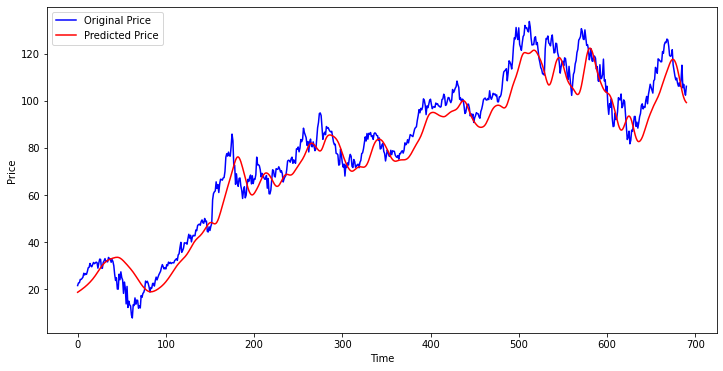

In [37]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()